# Quest3

## Part A. Web Scrapping

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
res = req.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")

In [3]:
soup = bs(res.content, "html.parser")

## Parse HTML

In [75]:

tableNode = soup.select('td')

namelist = []
volumelist = []
percentlist = []

# 1~20
# 1 : Name
# 3 : PctChange
# 4 : Volume
for i in range(1,21):
    if i%4 == 0:
        volumelist.append(int(str(tableNode[i]).replace('<td>', '').replace(' </td>', '').replace(',', '')))
        conamestr = re.sub(r'</div>\n</td>', '', re.sub(r'<td>(?s).*coName small">', '', str(tableNode[i-3])))
        conamestr = re.sub(r',(s?).*','',conamestr.replace('Inc.', '').replace('Group', '').replace('Ltd.', '').replace('Technology', ''))
        namelist.append(conamestr.strip())
        percentchange = str(tableNode[i-1])
        if "▼" in percentchange:
            percentchange = float('-' + re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))
        else:
            percentchange = float(re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))

        percentlist.append(percentchange)

print(namelist)
print(volumelist)
print(percentlist)

['Micron', 'Invesco QQQ Trust', 'Marvell', 'Cronos', 'Apple']
[29278051, 25905730, 19307324, 16850915, 15262370]
[0.47, -0.31, 0.07, 0.36, 0.46]





## Volume

In [76]:
%matplotlib inline

x = namelist
yval = volumelist
x_pos = [i for i, _ in enumerate(x)]

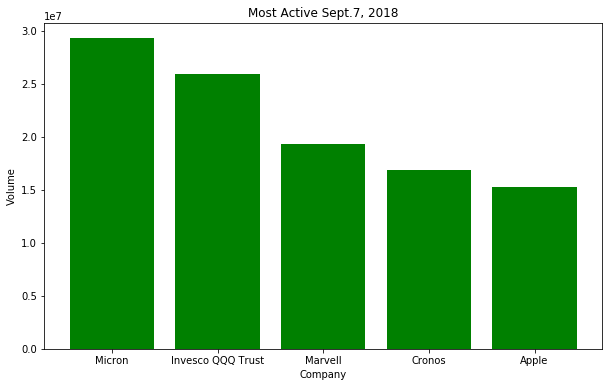

In [77]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='green')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Volume")
plt.title("Most Active Sept.7, 2018")
plt.show()

In [78]:
%matplotlib inline

x = namelist
yval = percentlist
x_pos = [i for i, _ in enumerate(x)]

## Percent Change

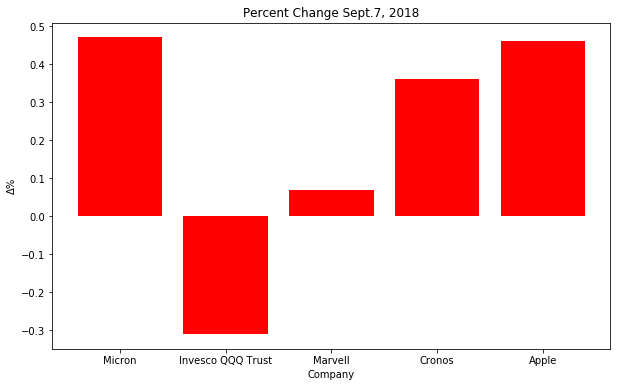

In [79]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Δ%")
plt.title("Percent Change Sept.7, 2018")
plt.show()

## Part B. Timing Comparison

In [98]:
from collections import Counter
import random
import string

In [99]:
# My Function

def wordsInStringToDictWordCount(str):
    
    return_dict = {}
    
    if len(str) > 1:        
        temp_list = str.split()
        
        for i in temp_list:
            if i in return_dict:
                return_dict[i] += 1
            else:
                return_dict[i] = 1
                
    return return_dict

In [100]:
# Counter class
def beatTheCounter(str):
    cnt = Counter()
    temp_list = str.split()
    
    for i in temp_list:
        cnt[i] += 1

    return cnt

In [ ]:
# File IO
# with open('')

In [105]:
# wordsInStringToDictWordCount(longstring)

## Part C. Pytest for Regex

# Part D. CSV Files